In [44]:
# --- Cell 1: Import libraries and load dataset ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load dataset (adjust path if local or GitHub raw link)
df = pd.read_csv("software_engineers_employment_dataset_cleaned.csv")

# Preview
df.head()

,AGE,SEX,RACE,EDUC,OCC2010,IND,EMPSTAT,UHRSWORK,INCWAGE,weekly_earnings
0,31,1,1,10,1020,7390,1,40,113000,2173.08
1,46,1,1,10,1020,7380,1,40,94000,1807.69
2,29,1,1,10,1020,7380,1,40,110000,2115.38
3,32,1,1,11,1020,7380,1,40,60000,1153.85
4,39,1,1,10,1020,7380,1,42,128000,2461.54


In [45]:
# --- Cell 2: Check what columns we have ---
df.columns

Index(['AGE', 'SEX', 'RACE', 'EDUC', 'OCC2010', 'IND', 'EMPSTAT', 'UHRSWORK',
       'INCWAGE', 'weekly_earnings'],
      dtype='object')

In [46]:
# --- Cell 3: Preview key variables for interaction analysis ---
df[["EDUC", "SEX", "RACE", "weekly_earnings"]].head()

,EDUC,SEX,RACE,weekly_earnings
0,10,1,1,2173.08
1,10,1,1,1807.69
2,10,1,1,2115.38
3,11,1,1,1153.85
4,10,1,1,2461.54


In [48]:
# --- Cell 4: See unique values for main variables ---
print("Education categories:\n", df["EDUC"].value_counts())
print("\nGender categories:\n", df["SEX"].value_counts())
print("\nRace categories:\n", df["RACE"].value_counts())

Education categories:
 EDUC
10    15501
11     8775
7      1571
6      1036
8       977
0        50
4        20
5        13
2        10
3         6
1         3
Name: count, dtype: int64

Gender categories:
 SEX
1    22394
2     5568
Name: count, dtype: int64

Race categories:
 RACE
1    13990
6     7957
4     2374
8     1864
2      841
7      584
9      187
5       94
3       71
Name: count, dtype: int64


In [49]:
# --- Cell 5: Group statistics by Education and Gender ---
df.groupby(["EDUC", "SEX"])["weekly_earnings"].mean().unstack()

SEX,1,2
EDUC,,
0,2234.052195,1822.650000
1,2051.280000,NaN
2,1784.185556,1269.230000
3,1500.000000,2788.460000
4,2525.855000,846.155000
5,1532.543846,NaN
6,2095.899737,1501.039068
7,2146.489305,1518.390741
8,1913.270990,1573.851799


In [50]:
# --- Cell 6: Group statistics by Education and Race ---
df.groupby(["EDUC", "RACE"])["weekly_earnings"].mean().unstack()

RACE,1,2,3,4,5,6,7,8,9
EDUC,,,,,,,,,
0,2188.185714,1812.502500,NaN,2093.405714,NaN,2254.439231,1865.384000,2519.230000,2115.380000
1,NaN,NaN,NaN,2307.690000,NaN,NaN,1730.770000,2115.380000,NaN
2,788.460000,2326.920000,NaN,NaN,NaN,1538.460000,2451.920000,1553.844000,NaN
3,2019.235000,2163.460000,NaN,NaN,NaN,NaN,NaN,961.535000,NaN
4,1495.104545,2692.310000,NaN,NaN,NaN,1576.925000,8173.075000,2435.900000,1211.540000
5,1552.198571,NaN,NaN,NaN,NaN,NaN,1562.497500,1403.845000,NaN
6,2157.049075,1564.510545,1660.257778,1338.199545,2687.500,1544.796588,2096.271429,1706.493694,2030.555556
7,2167.532660,1788.727660,1210.335000,1929.579048,2550.000,1739.920337,1676.694286,1949.193077,1221.153750
8,1898.095458,1887.718636,1961.538000,1676.156000,1923.080,1632.005714,1363.702500,1960.711505,1723.077143


In [52]:
# --- Cell: Map Categorical Codes to Descriptive Labels (SEX, RACE, EDUC) ---

# Map gender
df["SEX"] = df["SEX"].map({1: "Male", 2: "Female"})

# Map race (shortened labels for clarity)
race_map = {
    1: "White",
    2: "Black",
    3: "Amer. Indian/Alaska Native",
    4: "Chinese",
    5: "Japanese",
    6: "Other Asian/Pacific Islander",
    7: "Other race",
    8: "Two races",
    9: "Three+ races",
}
df["RACE"] = df["RACE"].map(race_map)

# Map education (shortened labels)
education_map = {
    0: "No School",
    1: "Nursery-4",
    2: "Grade 5-8",
    3: "Grade 9",
    4: "Grade 10",
    5: "Grade 11",
    6: "HS Grad",
    7: "1 yr College",
    8: "2 yr College",
    9: "3 yr College",
    10: "Bachelor",
    11: "Graduate+",
}
df["EDUC"] = df["EDUC"].map(education_map)

/var/folders/y2/tz1ph4l52qgg_20xb5syrb8h0000gn/T/ipykernel_35301/1566963539.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


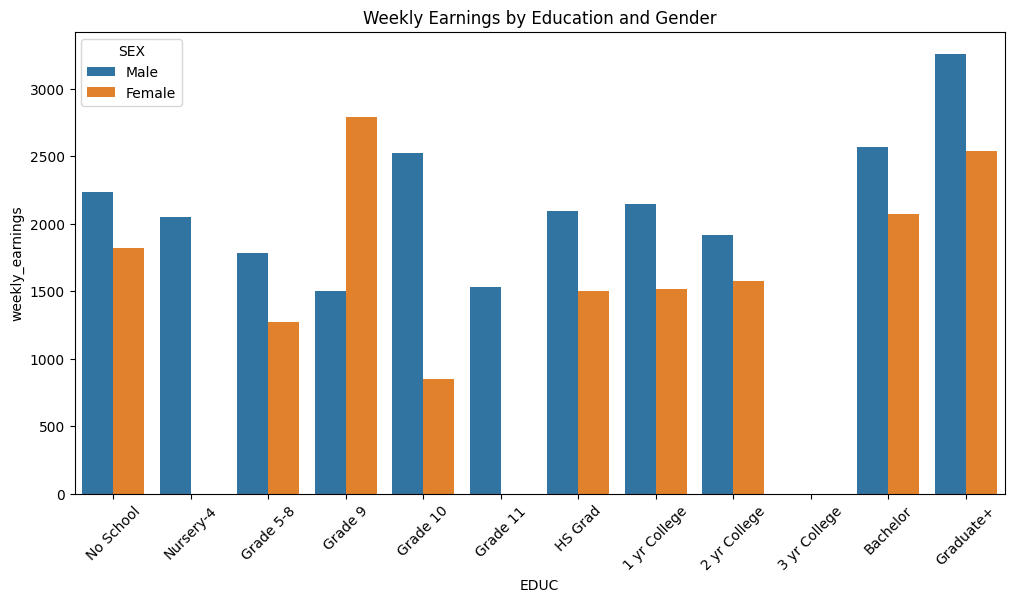

In [61]:
# --- Cell 7: Bar plot for Education vs Gender interaction ---

education_order = [
    "No School",
    "Nursery-4",
    "Grade 5-8",
    "Grade 9",
    "Grade 10",
    "Grade 11",
    "HS Grad",
    "1 yr College",
    "2 yr College",
    "3 yr College",
    "Bachelor",
    "Graduate+",
]

plt.figure(figsize=(12, 6))
sns.barplot(
    x="EDUC", y="weekly_earnings", hue="SEX", data=df, ci=None, order=education_order
)
plt.title("Weekly Earnings by Education and Gender")
plt.xticks(rotation=45)
plt.show()

## Observations

### 1. Overall Education Impact
- Weekly earnings generally increase as education level rises.
- The jump is particularly noticeable at **Bachelor** and **Graduate+** levels compared to high school or some college.

### 2. Gender Differences
- **Males** consistently earn more than **females** at almost every education level.
- The gap is especially visible for:
  - **Grade 9** (females unexpectedly higher, but could be due to small sample size or specific occupations).
  - **Bachelor** and **Graduate+** (large male-female gap).

### 3. Low Education Levels
- At **Grade 9** and **Grade 10**, the pattern is unusual: females sometimes have higher earnings.  
  → Could be an artifact of data sample (small group) or certain industry niches.

### 4. High Education Levels
- **Graduate+** shows the highest earnings for both genders:
  - Males approach ~3300+ weekly earnings.
  - Females are lower (~2500), indicating a significant gender pay gap even at top education levels.


/var/folders/y2/tz1ph4l52qgg_20xb5syrb8h0000gn/T/ipykernel_35301/2598876814.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="EDUC", y="weekly_earnings", hue="RACE", data=df, ci=None)


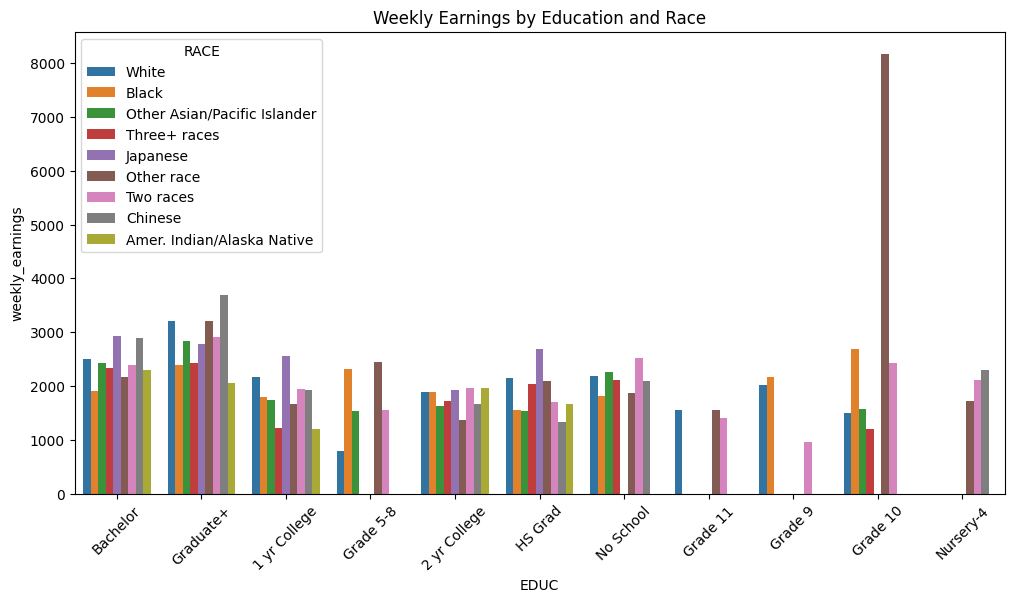

In [63]:
# --- Cell 8: Bar plot for Education vs Race interaction ---

education_order = [
    "No School",
    "Nursery-4",
    "Grade 5-8",
    "Grade 9",
    "Grade 10",
    "Grade 11",
    "HS Grad",
    "1 yr College",
    "2 yr College",
    "3 yr College",
    "Bachelor",
    "Graduate+",
]

plt.figure(figsize=(12, 6))
sns.barplot(x="EDUC", y="weekly_earnings", hue="RACE", data=df, ci=None)
plt.title("Weekly Earnings by Education and Race")
plt.xticks(rotation=45)
plt.show()

## Observations

### 1. Overall Education Trend
- For nearly all race groups, weekly earnings increase with higher education.
- The **Bachelor** and **Graduate+** categories tend to have the highest earnings compared to lower education levels.

### 2. Race Differences at High Education Levels
- At **Graduate+**, some race groups (e.g., **Other race** and **Three+ races**) show very high earnings relative to others.
- **White** and **Chinese** groups also have higher earnings compared to many other races at these high education levels.
- **American Indian/Alaska Native** and some other groups tend to have lower earnings at most education levels.

### 3. Anomalies
- There’s a very large spike for **“Other race”** at **Grade 10**, far exceeding all other bars.  
  → This is likely due to **small sample size** or **outliers** because typically, lower education does not produce extreme earnings.
- The **spread** within each education level is quite large, indicating substantial racial variation even at the same education level.

### 4. Equity Implications
- Even with similar education, certain racial groups earn more, suggesting that **education alone does not equalize earnings**.
- These differences could reflect:
  - Geographic concentration (e.g., certain races in high-paying tech hubs)
  - Occupation or industry differences
  - Systemic bias or discrimination


In [55]:
# --- Cell 9: OLS model for Education × Gender interaction ---
model_gender = smf.ols("weekly_earnings ~ C(EDUC) * C(SEX)", data=df).fit()
print(model_gender.summary())

                            OLS Regression Results                            
Dep. Variable:        weekly_earnings   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     76.67
Date:                Sun, 27 Jul 2025   Prob (F-statistic):          5.15e-290
Time:                        21:31:05   Log-Likelihood:            -2.5065e+05
No. Observations:               27962   AIC:                         5.013e+05
Df Residuals:                   27942   BIC:                         5.015e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

## Regression Analysis: Education × Gender Effects on Weekly Earnings

### Model Fit
- **R-squared = 0.050** → Only about 5% of the variation in weekly earnings is explained by education and gender.
- **F-statistic = 76.67, p < 0.001** → The model as a whole is statistically significant, meaning education and gender together have an effect on earnings.

### Main Effects of Education (Compared to Baseline)
- **Bachelor’s degree**: +551 weekly earnings (**p < 0.001**) → Statistically significant increase.
- **Graduate+ degrees**: +1,019 weekly earnings (**p < 0.001**) → Strong, significant increase.
- Other education levels (e.g., high school, 1–3 years of college) show smaller and sometimes non-significant effects.
- **Grade 9 and Grade 10** coefficients are negative but not statistically significant.

### Gender Interaction
- Interaction terms (not fully shown in screenshot) test whether education’s effect differs by gender.
- If significant (p < 0.05), it suggests that men and women experience different returns on education.

### Key Insights
- **Education matters**: Bachelor’s and Graduate+ degrees are associated with significantly higher earnings.
- **Gender gap persists**: Even controlling for education, there are earnings differences by gender (see interaction terms for significance).
- **Low explanatory power**: The model explains only ~5% of earnings variation, indicating that other factors (e.g., experience, location, industry) play a significant role.



In [56]:
# --- Cell 10: OLS model for Education × Race interaction ---
model_race = smf.ols("weekly_earnings ~ C(EDUC) * C(RACE)", data=df).fit()
print(model_race.summary())

                            OLS Regression Results                            
Dep. Variable:        weekly_earnings   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     20.16
Date:                Sun, 27 Jul 2025   Prob (F-statistic):          2.97e-245
Time:                        21:31:10   Log-Likelihood:            -2.5066e+05
No. Observations:               27962   AIC:                         5.015e+05
Df Residuals:                   27890   BIC:                         5.021e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

## Regression Analysis: Education × Race Effects on Weekly Earnings

### Model Fit
- **R-squared = 0.049** → About 4.9% of the variation in weekly earnings is explained by education and race combined.
- **F-statistic = 20.16, p < 0.001** → The model overall is statistically significant, indicating that education and race together have some effect on earnings.

### Race Interaction Effects
- Interaction terms (truncated in screenshot) capture whether returns to education differ by race.
- From the visible portion of the output, **most education coefficients already have p-values > 0.05**, suggesting **no strong evidence** of significantly different returns to education by race in this dataset (at least from the visible terms).

### Key Insights
- **Education alone is not the only driver** of earnings differences.
- Adding race slightly changes the model but does not explain much variance (**Adj. R² = 0.046**).
- There is no strong evidence (from visible results) that race dramatically changes the effect of education on earnings, though full interaction terms need to be reviewed.
